### Decision Trees II - Titanic Dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



In [2]:
#Load dataset
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Cleaning the dataset

In [3]:
#We see that Cabin column contains 687 null values out of 891 rows / observations. 
#So,Lets drop it.
df.drop('Cabin', axis=1, inplace=True)

##Embarked fill null value
df.Embarked.fillna("C", inplace=True)
df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'] = df['Embarked'].cat.codes

#Age ..replacing with median value
df['Age'].fillna(df['Age'].median(), inplace = True)

df['Sex'] = df.Sex.apply(lambda x: 0 if x == "female" else 1)

## removing name and Ticked as its not needed for our analysis
drop_elements = ['Name', 'Ticket']
df = df.drop(drop_elements, axis = 1)


### Split the dataset into train, development  and test set

In [4]:
data_X = df
data_X


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [5]:
X_train, y_train,x_valid,y_valid,X_test,y_test = train_valid_test_split(data_X,target='Survived',
                                                                  train_size=0.8, valid_size=0.1, test_size=0.1)
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
750,751,2,0,4.0,1,1,23.0000,2
677,678,3,0,18.0,0,0,9.8417,2
635,636,2,0,28.0,0,0,13.0000,2
356,357,1,0,22.0,0,1,55.0000,2
417,418,2,0,18.0,0,2,13.0000,2
...,...,...,...,...,...,...,...,...
48,49,3,1,28.0,2,0,21.6792,0
884,885,3,1,25.0,0,0,7.0500,2
716,717,1,0,38.0,0,0,227.5250,0
333,334,3,1,16.0,2,0,18.0000,2


### Model performance on development or Validation set

At depth: 2


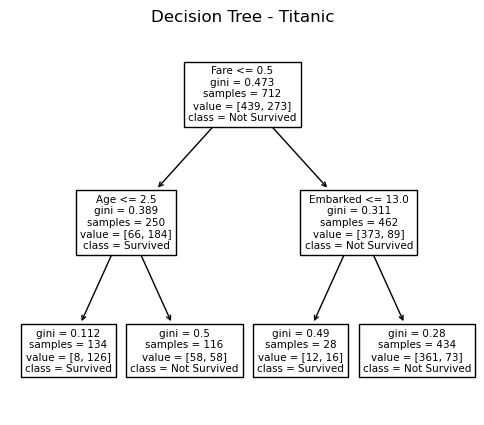

Performance with training set is: 0.7879213483146067
Performance with development set is: 0.8202247191011236


In [6]:
# training a model 
pruned = DecisionTreeClassifier(max_depth=2)
max_dep = pruned.fit(X_train, y_train)
print("At depth:", pruned.tree_.max_depth)
fig = plt.figure(figsize=(6,5))
tree.plot_tree(max_dep,feature_names=['Pclass','Age','Fare','Embarked','Sex'],class_names=['Not Survived','Survived'])
plt.title('Decision Tree - Titanic')
plt.show()
print("Performance with training set is:", pruned.score(X_train, y_train))
print("Performance with development set is:", pruned.score(x_valid, y_valid))


At depth: 3


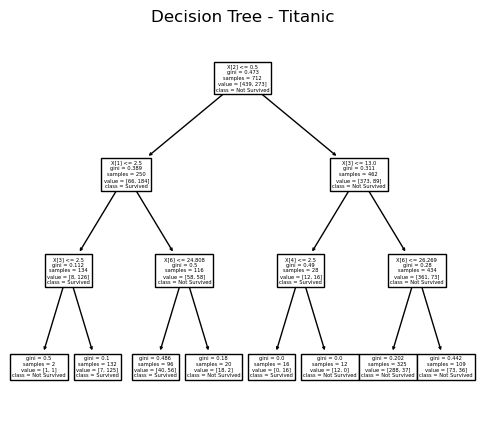

Performance with training set is: 0.827247191011236
Performance with development set is: 0.8651685393258427


In [7]:
# training a model without pruning
pruned = DecisionTreeClassifier(max_depth=3)
max_dep = pruned.fit(X_train, y_train)
print("At depth:", pruned.tree_.max_depth)
fig = plt.figure(figsize=(6,5))
tree.plot_tree(max_dep,class_names=['Not Survived','Survived'])
plt.title('Decision Tree - Titanic')
plt.show()

print("Performance with training set is:", pruned.score(X_train, y_train))
print("Performance with development set is:", pruned.score(x_valid, y_valid))

At depth: 4


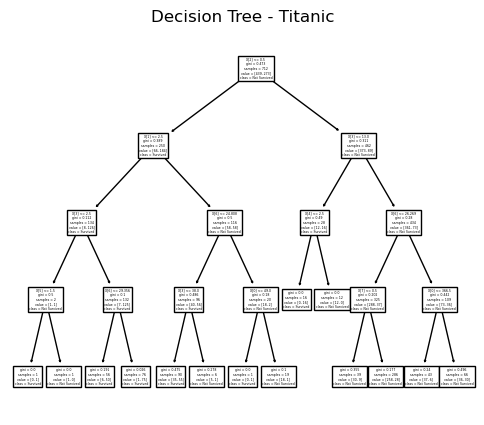

Performance with training set is: 0.8356741573033708
Performance with development set is: 0.8651685393258427


In [8]:
# training a model without pruning
pruned = DecisionTreeClassifier(max_depth=4)
max_dep = pruned.fit(X_train, y_train)
print("At depth:", pruned.tree_.max_depth)
fig = plt.figure(figsize=(6,5))
tree.plot_tree(max_dep,class_names=['Not Survived','Survived'])
plt.title('Decision Tree - Titanic')
plt.show()
print("Performance with training set is:", pruned.score(X_train, y_train))
print("Performance with development set is:", pruned.score(x_valid, y_valid))

At depth: 5


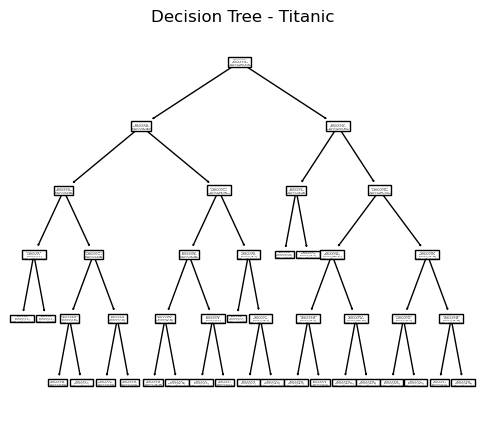

Performance with training set is: 0.848314606741573
Performance with development set is: 0.8426966292134831


In [9]:
# training a model without pruning
pruned = DecisionTreeClassifier(max_depth=5)
max_dep = pruned.fit(X_train, y_train)
print("At depth:", pruned.tree_.max_depth)
fig = plt.figure(figsize=(6,5))
tree.plot_tree(max_dep,class_names=['Not Survived','Survived'])
plt.title('Decision Tree - Titanic')
plt.show()
print("Performance with training set is:", pruned.score(X_train, y_train))
print("Performance with development set is:", pruned.score(x_valid, y_valid))

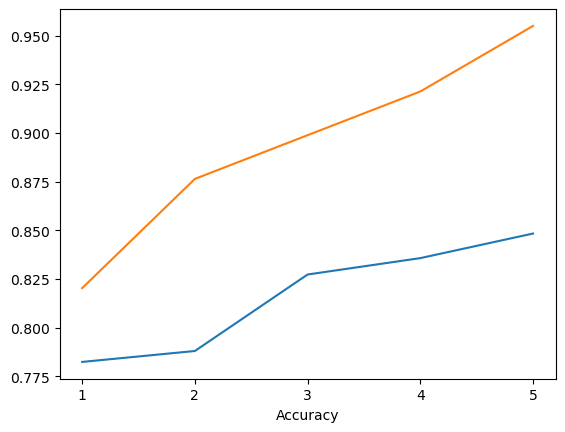

In [10]:
# Graph of training and development set  
pruned_depths = range(1,6)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  pruned_scores.append(score)
    
pruned_scores1 = [] 
for d in pruned_depths:    
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(x_valid, y_valid)
  score = clf.score(x_valid, y_valid)
  pruned_scores1.append(score)
  

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
ax.plot(pruned_depths, pruned_scores1) # Development set
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

From the above line graph Accuracy gradually increases in training set than in development set

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(1, 40)}

n_folds=5
# instantiate the model
dtree = DecisionTreeClassifier(criterion='gini',
                              random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                   cv = n_folds,
                   scoring = 'accuracy')
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [12]:
#Accuracy on final model with test dataset
score = tree.score(X_test,y_test)

print ('Accuracy on final model : ', score )

Accuracy on final model :  0.8111111111111111


### Tree - Bagged,Random and Bootstrap

In [13]:
#List of values to try for n_estimators:

estimator_range = [1] + list(range(10,150,20))
scores=[]

for estimator in estimator_range:
    reg = BaggingClassifier(n_estimators=estimator,random_state=0)
    reg.fit(X_train,y_train)
    scores.append(reg.score(X_test,y_test))

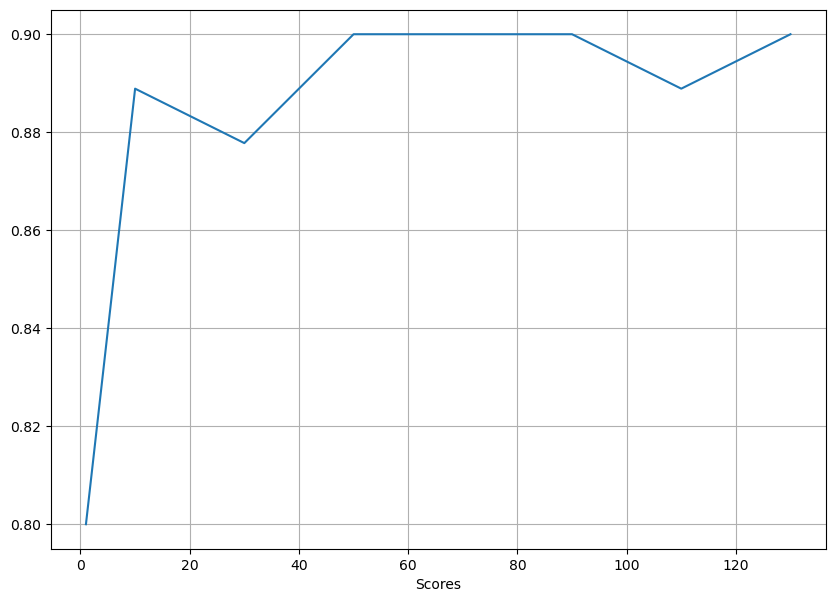

In [14]:
plt.figure(figsize = (10,7))
plt.plot(estimator_range,scores)
plt.xlabel('n_estimators')
plt.xlabel('Scores')
plt.grid()

From the graph , the scores keeps improving at a certain number of estimators(decision trees).One way to get better score is to include more features in feature matrix.

### Bagged Model

In [17]:
# Instance of the model
d_tree = DecisionTreeClassifier(max_depth=2)
bag_model = BaggingClassifier(base_estimator=d_tree,
                              max_samples = 0.8,
                             n_estimators=20, 
                             random_state=10)

#Traning the model in data
tree_model = d_tree.fit(X_train, y_train)
bag_model = bag_model.fit(X_train,y_train)


#Make predictions
print("Accuracy base:",tree_model.score(X_test, y_test))
print("Accuracy bag_model:",bag_model.score(X_test, y_test))

Accuracy base: 0.8
Accuracy bag_model: 0.7888888888888889


### RandomForest

In [18]:
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=20, max_depth=2,random_state=0,)
random = forest.fit(X_train, y_train)

score = cross_val_score (random,X_test,y_test)
#forest.estimators_

score.mean()


0.8

In [19]:
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.347136
6    0.257118
1    0.100948
7    0.100086
4    0.086447
3    0.053479
0    0.037647
5    0.017139
dtype: float64

Sex features is the feature that contributes the most to predicting whether a passenger survives or not.

In [20]:
# Tuning Random forest model with n_estimator as 50 and max_depth 3
forest = RandomForestClassifier(n_estimators=50, max_depth=3,random_state=0,)
random = forest.fit(X_train, y_train)

score = cross_val_score (random,X_test,y_test)
#forest.estimators_

score.mean()


0.8

Random forest model with n_estimator 50 and max_depth 3 has the accuracy as 0.8 , can ge predicted to be good model.